In [22]:
# Import all required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
#load csv file data with headers

location = "datasets/diamonds.csv"
df = pd.read_csv(location)

In [7]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
#Get the total rows and columns
df.shape

(53940, 11)

In [ ]:
#The data set contains 53940 rows and 11 columns. 

In [10]:
# check for missing values
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
# We checked if there are any missing values, including empty cells and NaN values. We found there are no missing values. 
# That means the diamond data set is clean.

In [12]:
# grouping by cut and mean of price
df.groupby('cut')['price'].mean()

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

In [ ]:
# We group by the cut based on average price. 
#Analysis: The average cost of the premium and fair quality are close but we need to do further statistical analysis to compare mean by performing T-test so we can make our final analysis. 

In [16]:
# Counting units sold
pd.value_counts(df['cut'])

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
# Number of units(pieces) sold per "cut" category.

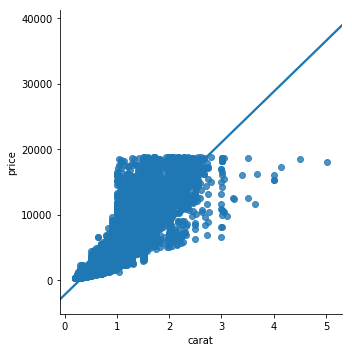

In [30]:
# Scatterplot of 'price' vs 'cut'
sns.lmplot(x='carat', y='price', data=df)

In [ ]:
# We tried to see if there is any correltion between price and carat on the data set. Above scatte plot shows that there is porisive 
#correlation between price and carat. The more weight means more price, which make more sense. 

In [32]:
#Standard Deviation Method

meangrade = df['price'].mean()
stdgrade = df['price'].std()
toprange = meangrade + stdgrade * 1.96
botrange = meangrade - stdgrade * 1.96

newdf = df.copy() #to not mess up the original df
newdf = newdf.drop(newdf[newdf['price'] > toprange].index)
newdf = newdf.drop(newdf[newdf['price'] < botrange].index)

newdf.head()
newdf.shape


(50300, 11)

In [ ]:
# We calculated the standard deviation and mean, and remove all the outliers. We have removed almost 3000 outlier 
#prices from the data set.